# AIR BNB PARIS DATA CLEANING AND EDA

## PART 1: DATA CLEANING

### A- Loading the dataframe and getting info about it

Prior of doing anything, we have to import the libraries that'll be useful for the analysis

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

First, we have to load the dataset

In [53]:
listings = pd.read_csv('C:/Users/Merveille/Desktop/DSTP12/DSPT12_EDA/listings.csv', delimiter=',')
listings.head()

id                         listing_url       scrape_id last_scraped  \
0  52931  https://www.airbnb.com/rooms/52931  20230904181324   2023-09-06   
1  53353  https://www.airbnb.com/rooms/53353  20230904181324   2023-09-05   
2   3109   https://www.airbnb.com/rooms/3109  20230904181324   2023-09-05   
3  54377  https://www.airbnb.com/rooms/54377  20230904181324   2023-09-05   
4   5396   https://www.airbnb.com/rooms/5396  20230904181324   2023-09-05   

            source                                               name  \
0  previous scrape  Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...   
1      city scrape  Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...   
2      city scrape  Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...   
3      city scrape  Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...   
4      city scrape  Rental unit in Paris · ★4.56 · Studio · 1 bed ...   

                                         description  \
0  I will be delighted to welcome you to my charm...   
1  A 100 m2 Loft/apartment (with 20 m2 terrace) o...   
2  Lovely Appartment with one bedroom with a Quee...   
3  We love Paris. Giving tourists the opportunity...   
4  NEW SOFA-BED SINCE JUNE 2023, Please disregard...   

                               neighborhood_overview  \
0  In some streets, Les Épinettes has also become...   
1  NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...   
2  Good restaurants<br />very close the Montparna...   
3  The district is cosmopolitan and particularly ...   
4  You are within walking distance to the Louvre,...   

                                         picture_url   host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  50502817  ...   
1  https://a0.muscache.com/pictures/2a1726b5-5a09...  37051412  ...   
2  https://a0.muscache.com/pictures/baeae9e2-cd53...      3631  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...    247562  ...   
4  https://a0.muscache.com/pictures/52413/f9bf76f...      7903  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.71                   4.24                4.24   
1                        4.91                   4.48                4.73   
2                        5.00                   5.00                5.00   
3                        5.00                   4.57                4.88   
4                        4.83                   4.95                4.55   

         license instant_bookable calculated_host_listings_count  \
0  7511706944917                t                            382   
1  7511800114704                f                              1   
2  7511409139079                f                              1   
3  7511800523290                f                              1   
4  7510402838018                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                         378   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            4   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.65  
1                                           0              0.24  
2                                           0              0.11  
3                                           0              1.19  
4                                           0              2.05  

[5 rows x 75 columns]

Now we wish to explore the number of rows and columns of the data
The dataframe has 75 columns and 67942 rows

In [54]:
listings.shape

(67942, 75)

Let's have more information about the columns and the type of data in the columns

In [55]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67942 non-null  int64  
 1   listing_url                                   67942 non-null  object 
 2   scrape_id                                     67942 non-null  int64  
 3   last_scraped                                  67942 non-null  object 
 4   source                                        67942 non-null  object 
 5   name                                          67942 non-null  object 
 6   description                                   67416 non-null  object 
 7   neighborhood_overview                         38031 non-null  object 
 8   picture_url                                   67942 non-null  object 
 9   host_id                                       67942 non-null 

In [56]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### B- Removing null, dummy, duplicates and NA values

Now we have to clean the dataset by detecting and removing the columns with a lot of nulls

In [57]:
listings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               14757
Length: 75, dtype: int64

In [58]:
##Remove columns that have a lot of null values
def columns_check(listing):
    isnull=[]
    for column in listing.columns:
        if pd.isnull(listing[column]).sum()>=30000 or pd.isna(listing[column]).sum()>=30000:
            isnull.append(column)     
    return isnull

columns_to_drop=columns_check(listings)
columns_to_drop

['host_about',
 'host_neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated']

In [59]:
listings.drop(columns=columns_to_drop,inplace=True)

After removing the nulls, let's remove the NAs

In [60]:
listings.dropna(how='all')

id                                      listing_url  \
0                   52931               https://www.airbnb.com/rooms/52931   
1                   53353               https://www.airbnb.com/rooms/53353   
2                    3109                https://www.airbnb.com/rooms/3109   
3                   54377               https://www.airbnb.com/rooms/54377   
4                    5396                https://www.airbnb.com/rooms/5396   
...                   ...                                              ...   
67937  972886538090125888  https://www.airbnb.com/rooms/972886538090125888   
67938  972890854868668144  https://www.airbnb.com/rooms/972890854868668144   
67939  972894575720459810  https://www.airbnb.com/rooms/972894575720459810   
67940  972904630185591405  https://www.airbnb.com/rooms/972904630185591405   
67941  972916211667468705  https://www.airbnb.com/rooms/972916211667468705   

            scrape_id last_scraped           source  \
0      20230904181324   2023-09-06  previous scrape   
1      20230904181324   2023-09-05      city scrape   
2      20230904181324   2023-09-05      city scrape   
3      20230904181324   2023-09-05      city scrape   
4      20230904181324   2023-09-05      city scrape   
...               ...          ...              ...   
67937  20230904181324   2023-09-05      city scrape   
67938  20230904181324   2023-09-05      city scrape   
67939  20230904181324   2023-09-05      city scrape   
67940  20230904181324   2023-09-05      city scrape   
67941  20230904181324   2023-09-05      city scrape   

                                                    name  \
0      Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...   
1      Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...   
2      Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...   
3      Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...   
4      Rental unit in Paris · ★4.56 · Studio · 1 bed ...   
...                                                  ...   
67937  Rental unit in Paris · ★New · 1 bedroom · 2 be...   
67938  Rental unit in Paris · ★New · 3 bedrooms · 5 b...   
67939  Rental unit in Paris · ★New · 3 bedrooms · 4 b...   
67940  Rental unit in Paris · ★New · 2 bedrooms · 4 b...   
67941  Rental unit in Paris · ★New · 1 bedroom · 3 be...   

                                             description  \
0      I will be delighted to welcome you to my charm...   
1      A 100 m2 Loft/apartment (with 20 m2 terrace) o...   
2      Lovely Appartment with one bedroom with a Quee...   
3      We love Paris. Giving tourists the opportunity...   
4      NEW SOFA-BED SINCE JUNE 2023, Please disregard...   
...                                                  ...   
67937  ClickYourTravel is delighted to present Suite ...   
67938  ClickYourTravel is delighted to present Suite ...   
67939  ClickYourTravel is pleased to present Suite Sa...   
67940  <b>The space</b><br />Ensuring the comfort of ...   
67941  <b>The space</b><br />Ensuring the comfort of ...   

                                   neighborhood_overview  \
0      In some streets, Les Épinettes has also become...   
1      NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...   
2      Good restaurants<br />very close the Montparna...   
3      The district is cosmopolitan and particularly ...   
4      You are within walking distance to the Louvre,...   
...                                                  ...   
67937  Located in the heart of Paris, in the 20th arr...   
67938  Located in the heart of Paris, our apartment i...   
67939  Located in the heart of Paris, our apartment i...   
67940                                                NaN   
67941                                                NaN   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/miso/Hosting-...   50502817  ...   
1      https://a0.muscache.com/pictures/2a1726b5-5a09...   37051412  ...   
2      https://a0.muscache.com/pic

Now, we can also remove the duplicates

In [61]:
listings.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

The datatype have to be adjusted for the analysis that will be performed. The prices have to be converted to float as well as the host response rate and the acceptace rate.
The time columns have to be converted to datetime format

In [62]:
listings['price'] = listings['price'].replace('[$,]', '', regex=True).astype(float) 
listings['host_since']=pd.to_datetime(listings['host_since'], format="%Y-%m-%d")
listings['host_since_year']=listings['host_since'].dt.year
listings['host_response_rate']= listings['host_response_rate'].replace('[%,]', '', regex=True).astype(float) 
listings['host_acceptance_rate']= listings['host_acceptance_rate'].replace('[%,]', '', regex=True).astype(float) 
listings['review_scores_location']=listings['review_scores_location'].fillna(0)

Let's now clean the dummy data to have data that makes more sense

In [63]:
dummy_values=listings[listings['price']>=20000].index
listings.drop(dummy_values,inplace=True)

In [64]:
dummy_values1=listings[listings['bedrooms']>=20].index
listings.drop(dummy_values1,inplace=True)

Now, we can review the shape our dataset. We have now 67928 rows and 71 columns

In [65]:
listings.shape

(67928, 71)

## PART 2: EXPLORATORY DATA ANALYSIS

### A- Describe important columns of the dataframe

For the quantitative columns (numerical columns) and especially for the columns that will be used in our dataset, we have to perform a statistical analysis.
The average price of an Airbnb in Paris is 203.36
The average review score in Paris for cleanliness, checkin and communication is around 4.60 and 4.80 while the average score for location is 3.71
The host globally have a good response rate of 92.55% while the acceptance rate 81.76%

In [66]:
listings[['host_listings_count','price','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','reviews_per_month','host_response_rate','host_acceptance_rate','minimum_nights','maximum_nights','number_of_reviews']].describe()

host_listings_count         price  review_scores_cleanliness  \
count         67921.000000  67928.000000               52676.000000   
mean             23.905037    203.368596                   4.604283   
std              89.604637    391.726366                   0.502789   
min               1.000000      8.000000                   0.000000   
25%               1.000000     80.000000                   4.460000   
50%               1.000000    124.500000                   4.750000   
75%               3.000000    209.000000                   4.960000   
max            2636.000000  15000.000000                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           52664.000000                 52674.000000   
mean                4.787374                     4.807132   
std                 0.399096                     0.388268   
min                 0.000000                     0.000000   
25%                 4.750000                     4.770000   
50%                 4.910000                     4.940000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  reviews_per_month  host_response_rate  \
count            67928.000000       53174.000000        42032.000000   
mean                 3.717956           1.122363           92.557647   
std                  2.024179           1.443799           18.886991   
min                  0.000000           0.010000            0.000000   
25%                  4.000000           0.190000           97.000000   
50%                  4.820000           0.630000          100.000000   
75%                  5.000000           1.540000          100.000000   
max                  5.000000          61.550000          100.000000   

       host_acceptance_rate  minimum_nights  maximum_nights  number_of_reviews  
count          45662.000000    67928.000000    6.792800e+04       67928.000000  
mean              81.767421       63.880815    7.530677e+02          23.821002  
std               26.324083      131.912888    3.837068e+04          53.983659  
min                0.000000        1.000000    1.000000e+00           0.000000  
25%               73.000000        2.000000    6.000000e+01           1.000000  
50%               96.000000        3.000000    3.650000e+02           6.000000  
75%              100.000000       20.000000    1.125000e+03          23.000000  
max              100.000000     1000.000000    1.000000e+07        2580.000000

### B- Understand Correlation between columns

Talking about relationships between variables, we thought about using statistical correlation to understand how the variables are related to each other.
Accommodates have a strong relationship with bedrooms which makes totally sense.
Accommodates and bedrooms have a weaker relationship with price this is primarily due to the fact the prices varies a lot from the style of apartment, to the location, ...


In [67]:
listings[['price','accommodates','bedrooms','host_listings_count','number_of_reviews']].corr()

price  accommodates  bedrooms  host_listings_count  \
price                1.000000      0.299030  0.287247             0.115575   
accommodates         0.299030      1.000000  0.723771             0.052345   
bedrooms             0.287247      0.723771  1.000000             0.056564   
host_listings_count  0.115575      0.052345  0.056564             1.000000   
number_of_reviews   -0.008568      0.035545  0.020131            -0.045812   

                     number_of_reviews  
price                        -0.008568  
accommodates                  0.035545  
bedrooms                      0.020131  
host_listings_count          -0.045812  
number_of_reviews             1.000000

### C- Heatmaps (Price & Review) with Markers of well known places in Paris 

To have a better geographical idea of distribution of prices throughout Paris, let's create a heatmap and add as markers well known places in Paris.
According to the chart, the prices are higher in the center of Paris, and also around those famous places.

In [68]:
folium_hmap = folium.Map(
   location=[listings['latitude'].median(),listings['longitude'].median()], 
   zoom_start=11, 
   tiles="OpenStreetMap"
)
folium_hmap.add_child(
    HeatMap(
        listings[['latitude','longitude','price']],
        min_opacity=0.1,
        radius = 6,
        blur = 5
    )
)
folium.Marker(
   location=[48.868496526,2.304498782],
   popup="CHAMPS-ÉLYSÉES",
).add_to(folium_hmap)
folium.Marker(
   location=[48.858370,	2.294481],
   popup="Eiffel Tower",
).add_to(folium_hmap)
folium.Marker(
   location=[48.886193,	2.343090],
   popup="Montmartre",
).add_to(folium_hmap)


In [69]:
#Get the latitude and longitude of the place with the highest price so that it can be added as a marker
listings['price'].max()
id_max=listings['price'].idxmax()
high_latitude=listings['latitude'].loc[id_max]
high_longitude=listings['longitude'].loc[id_max]
high_latitude
high_longitude

2.377928987641068

In [70]:
folium.Marker(
   location=[high_latitude,	high_longitude],
   popup="highest price",
).add_to(folium_hmap)
folium_hmap

We can also have a look at the reviews score location throughout Paris to understand around which location customers are most satisfied. In this case, Montmartre seems be an interesting area and have good scores.

In [71]:
folium_hmap1 = folium.Map(
   location=[listings['latitude'].median(),listings['longitude'].median()], 
   zoom_start=11, 
   tiles="OpenStreetMap"
)
folium_hmap1.add_child(
    HeatMap(
        listings[['latitude','longitude','review_scores_location']],
        min_opacity=0.1,
        radius = 6,
        blur = 5
    )
)
folium.Marker(
   location=[48.868496526,2.304498782],
   popup="CHAMPS-ÉLYSÉES",
).add_to(folium_hmap1)
folium.Marker(
   location=[48.858370,	2.294481],
   popup="Eiffel Tower",
).add_to(folium_hmap1)
folium.Marker(
   location=[48.886193,	2.343090],
   popup="Montmartre",
).add_to(folium_hmap1)
folium_hmap1

### D- Understand the price, availability distribution per accommodates

Let's now get deep into some quantitative variables to better understand our dataset.
For prices distribution per accommodates, the price really varies and are not the same.
2 & 3 bedrooms have lowest availability while higher bedrooms apartments have a higher availability

Text(0.5, 1.0, 'availability 365 per accommodates')

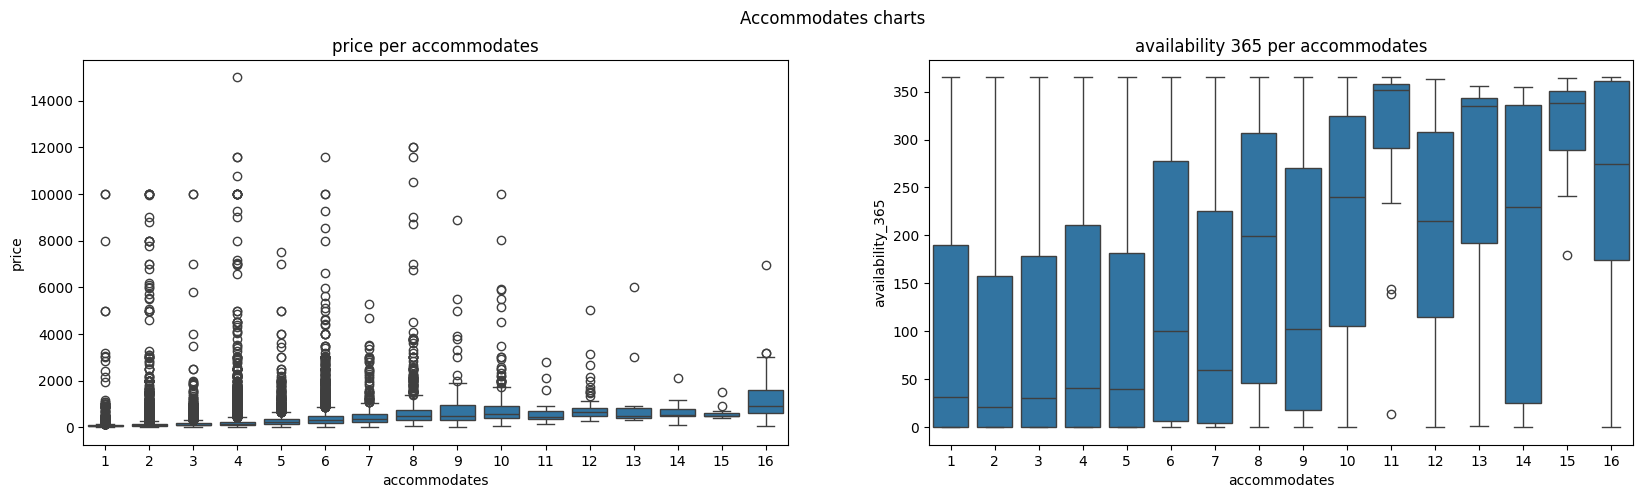

In [72]:
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(20, 5))
figure.suptitle('Accommodates charts')
sns.boxplot(data=listings, x="accommodates",y="price", ax=axes[0])
sns.boxplot(data=listings, x="accommodates",y="availability_365", ax=axes[1])
axes[0].set_title('price per accommodates')
axes[1].set_title('availability 365 per accommodates')

2 accommodates are the most popular types of offers in terms of AirbnB offer in Paris

<Axes: xlabel='accommodates', ylabel='Count'>

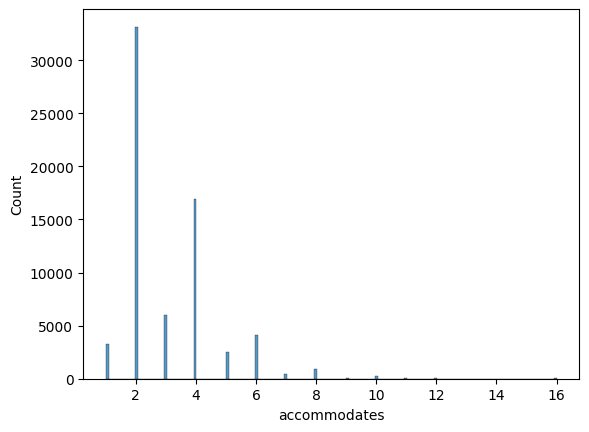

In [73]:
sns.histplot(data=listings, x="accommodates")

### E- Popular number of Bedrooms : 1 bedroom

In terms of popular number of bedrooms, the most popular number of bedrooms is the 1 bedroom. It's the most offered apartment size in Paris.

<Axes: xlabel='bedrooms', ylabel='Count'>

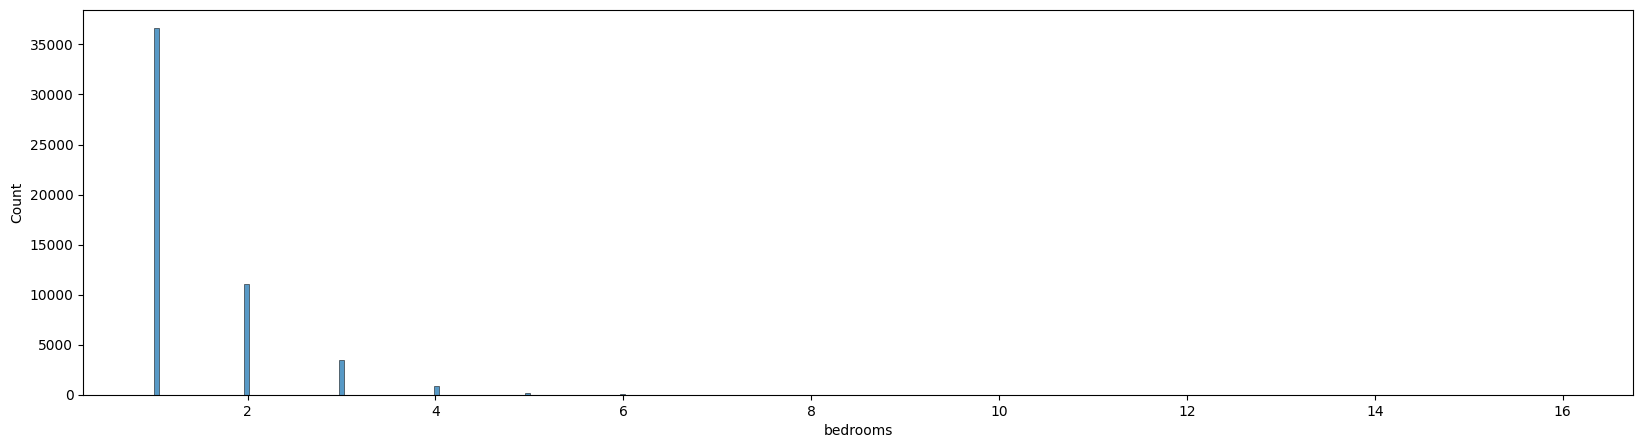

In [74]:
plt.figure(figsize=(20, 5))
sns.histplot(data=listings, x="bedrooms")

### F- Popular room type per neighbourhood

Another important thing is to know which type of apartment is mostly offered depending on the type of neighbourhood.
Buttes-Montmartre is the area that has the highest number of apartments followed by Popincourt, Vaugirard and Entrepot and the entire home is the most offered room type followed by private room.

<Axes: xlabel='neighbourhood_cleansed', ylabel='Count'>

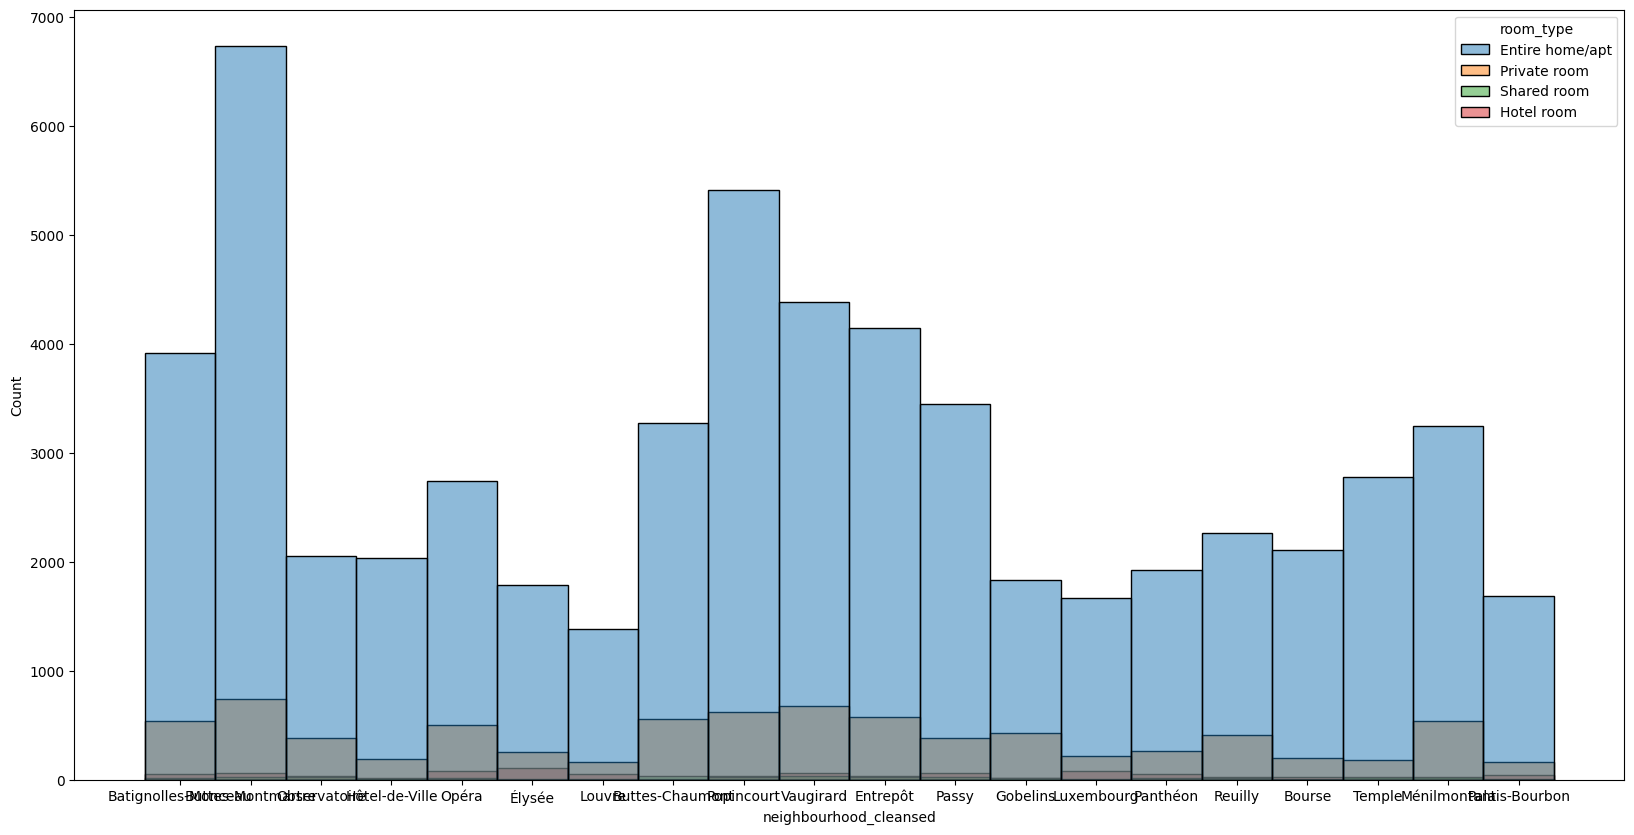

In [75]:
plt.figure(figsize=(20, 10))
sns.histplot(data=listings, x="neighbourhood_cleansed",hue='room_type')

### G- Year where we got most people joining airbnb and status of host identity verified

Also Interesting is to know the year at which most hosts joined Airbnb in Paris as well as the host status.
It turns out that most people joined Airbnb between 2015 and 2016 and between 2022 and 2023.
Most of the hosts have verified identity so it can be safe to book an apartment via Airbnb.

<Axes: xlabel='host_since_year', ylabel='Count'>

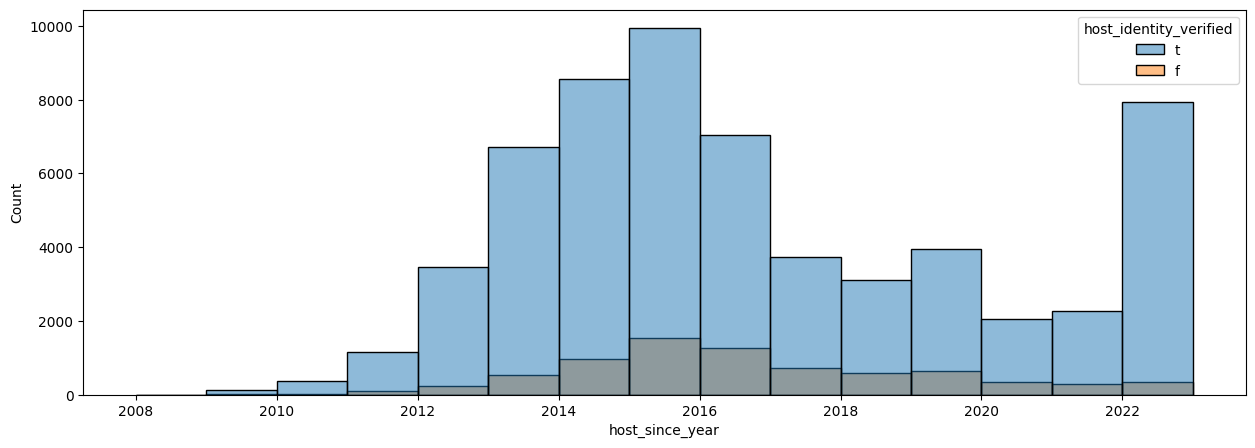

In [76]:
plt.figure(figsize=(15, 5))
sns.histplot(data=listings, x='host_since_year', hue="host_identity_verified",binwidth = 1)

### H-Number of hosts with Instant bookable & Superhost status

Still about the hosts, we realize that 1/7 of the hosts are superhosts.
And the instant bookle functionality is offered by around 17000 hosts. The others hosts choose not to offer that possibility

<Axes: xlabel='host_is_superhost', ylabel='Count'>

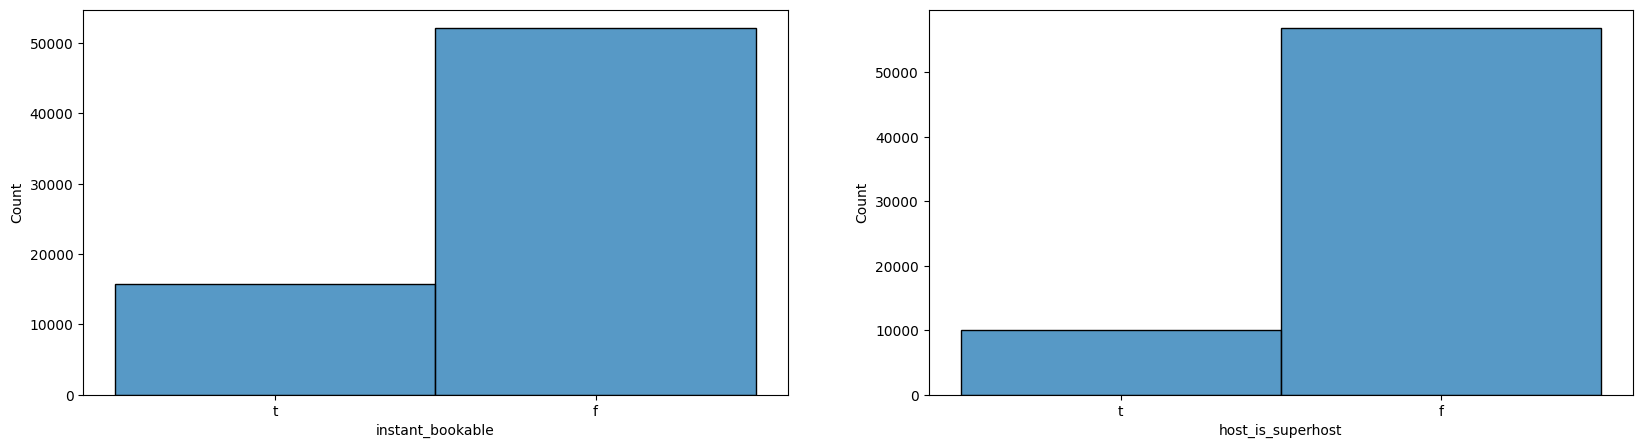

In [77]:
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(20, 5))
sns.histplot(data=listings, x="instant_bookable",binwidth = 1,ax=axes[0])
sns.histplot(data=listings, x="host_is_superhost", ax=axes[1])

### I-Responsiveness vs Superhost status

Responsiveness is also a good paramater to take a look into. Most of the hosts respond within an hour doesn't really matter if they're superhosts or not. 
Some superhosts meanwhile doesn't have a good responsiveness.

<Axes: xlabel='host_response_time', ylabel='Count'>

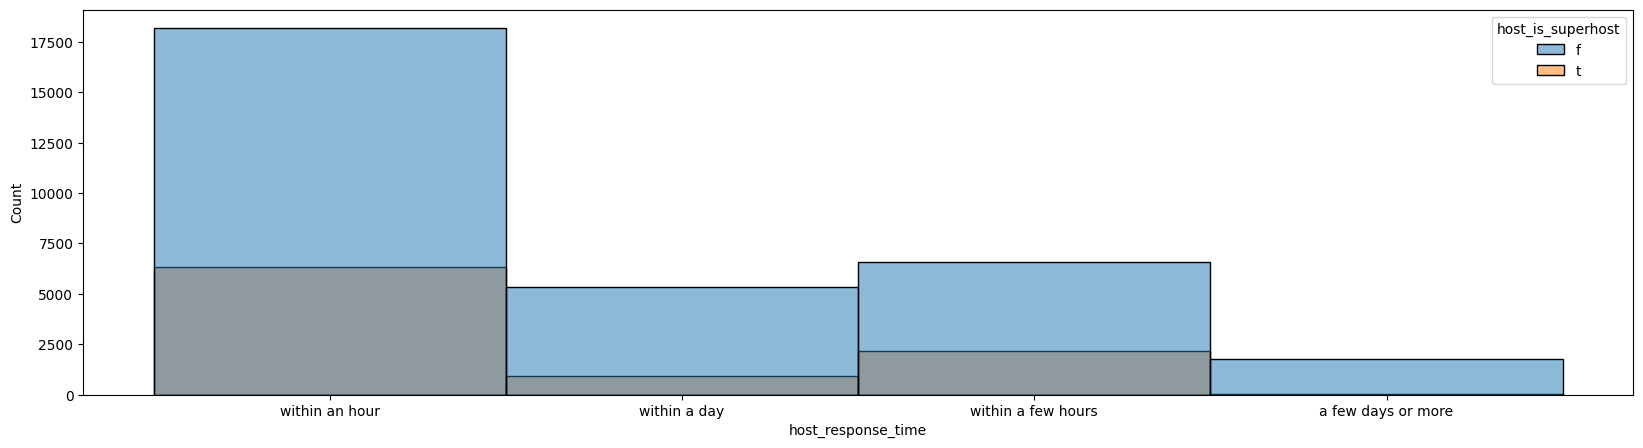

In [78]:
plt.figure(figsize=(20, 5))
sns.histplot(data=listings, x="host_response_time", hue='host_is_superhost')

### J- Acceptance and response rate

The response rate of 100% is the most common for hosts in Paris. It the case of around 30k hosts.
For the acceptance rate, 100% is common for around 18k hosts (~1/5 of the hosts) meaning mosts of the hosts respond but don't always accept a boooking from a customer.

<Axes: xlabel='host_acceptance_rate', ylabel='Count'>

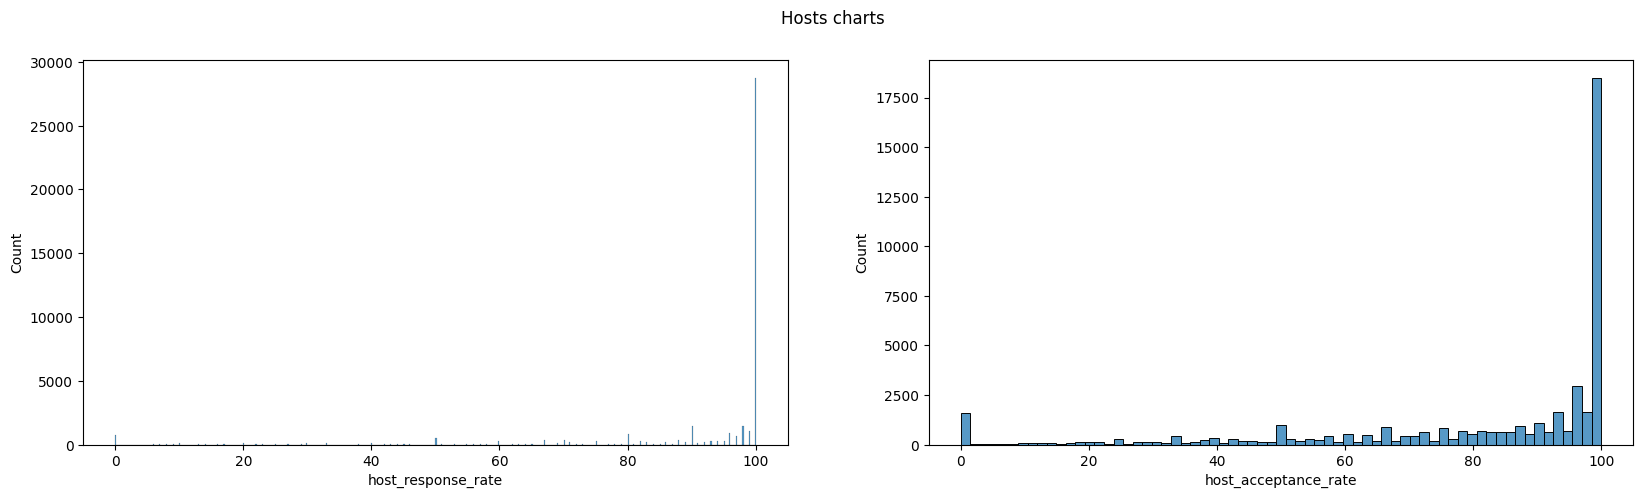

In [79]:
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(20, 5))
figure.suptitle('Hosts charts')
sns.histplot(data=listings, x="host_response_rate", ax=axes[0])
sns.histplot(data=listings, x="host_acceptance_rate", ax=axes[1] )


### J- Review score subplot

Focusing on the review scores, the overall review scores looks good. Around 5/7 of them have a score between 4 and 5. In Paris, the rating of Airbnbs really look good.

Text(0.5, 1.0, 'review_scores_value')

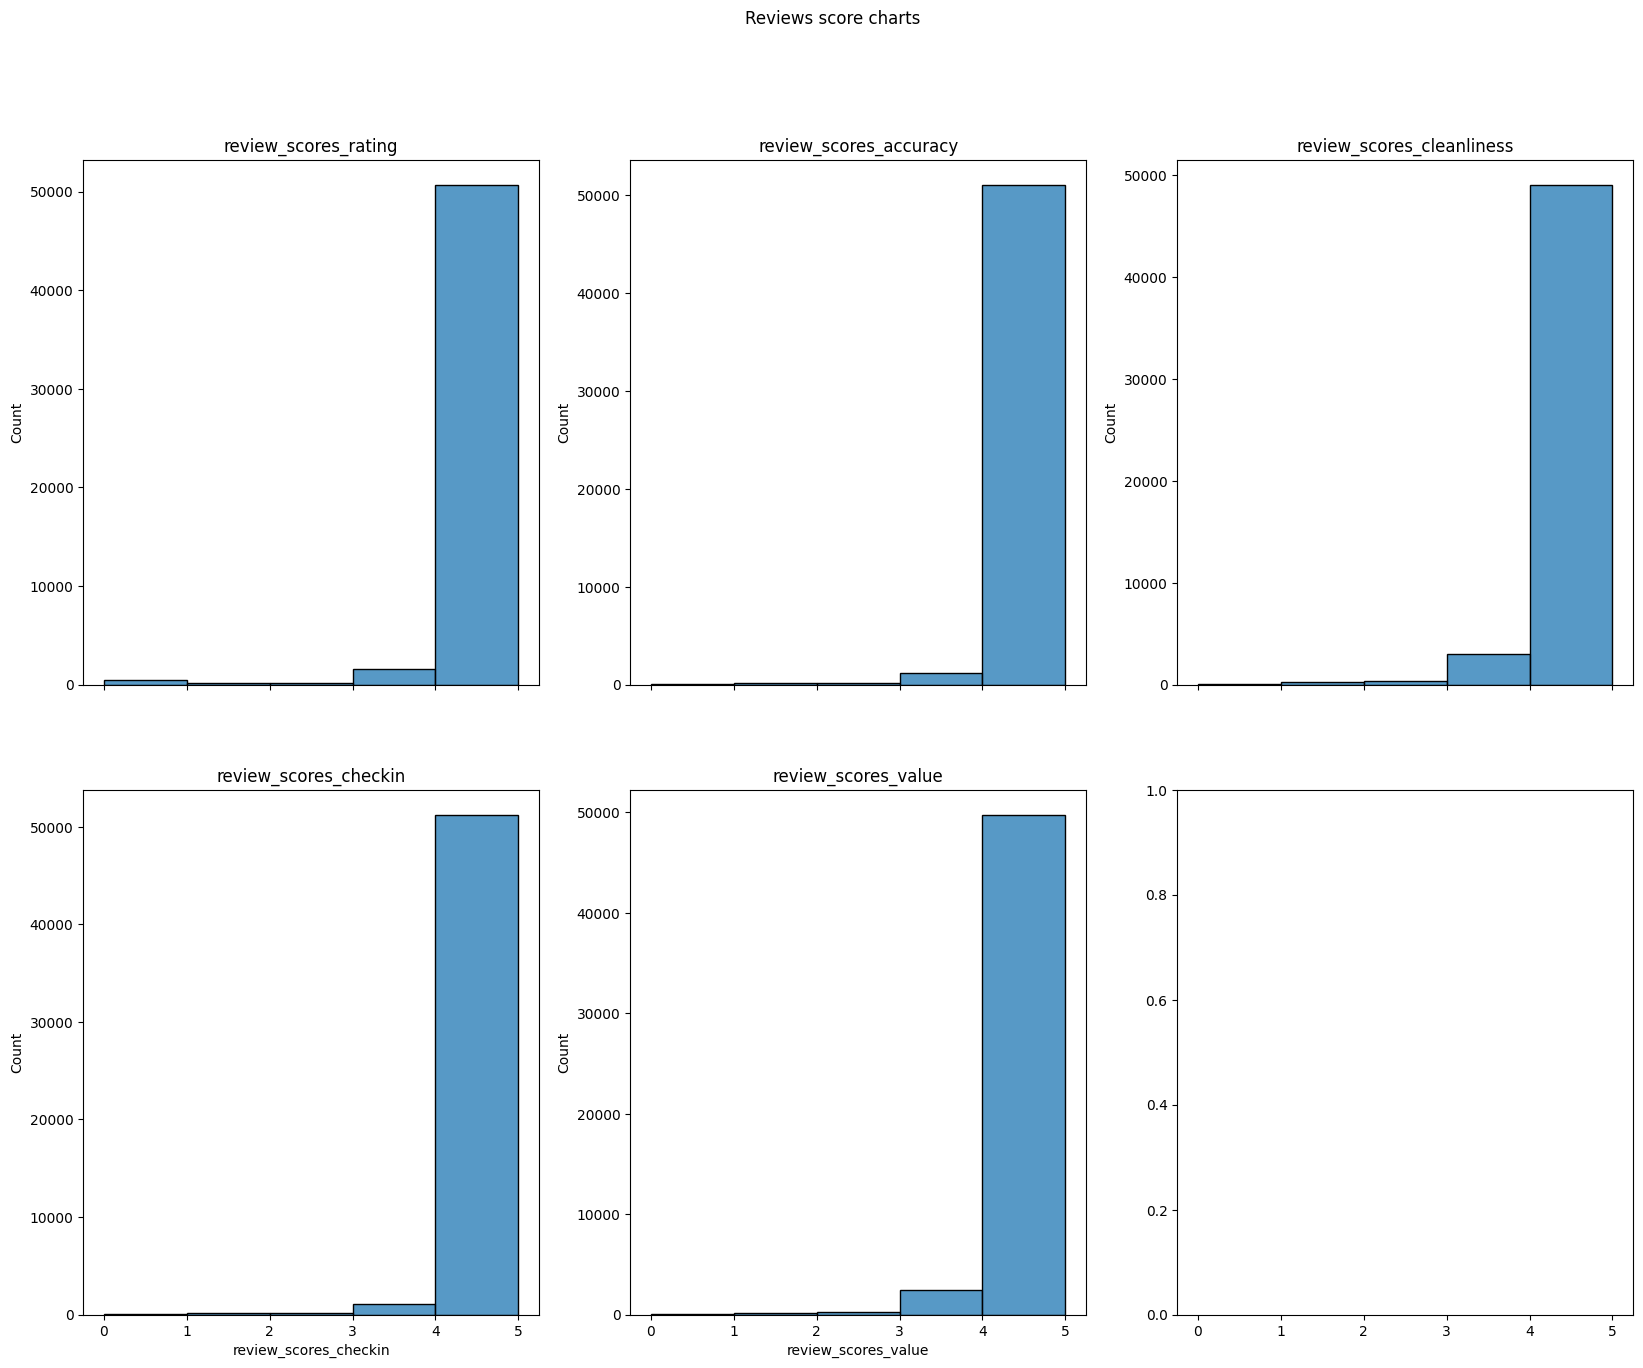

In [80]:
figure, axes = plt.subplots(2, 3, sharex=True,
                            figsize=(20, 15))
figure.suptitle('Reviews score charts')
sns.histplot(data=listings, x="review_scores_rating", binwidth = 1, ax=axes[0,0])
sns.histplot(data=listings, x="review_scores_accuracy",binwidth = 1, ax=axes[0,1])
sns.histplot(data=listings, x="review_scores_cleanliness",binwidth = 1, ax=axes[0,2])
sns.histplot(data=listings, x="review_scores_checkin",binwidth = 1, ax=axes[1,0])
sns.histplot(data=listings, x="review_scores_value",binwidth = 1, ax=axes[1,1])
axes[0,0].set_title('review_scores_rating')
axes[0,1].set_title('review_scores_accuracy')
axes[0,2].set_title('review_scores_cleanliness')
axes[1,0].set_title('review_scores_checkin')
axes[1,1].set_title('review_scores_value')


Focusing now on the communication review score and the host response time, it happens that even if a host has a good response time the rating can be bad,  affected by other parameters and also the other way round

<Axes: xlabel='host_response_time', ylabel='review_scores_communication'>

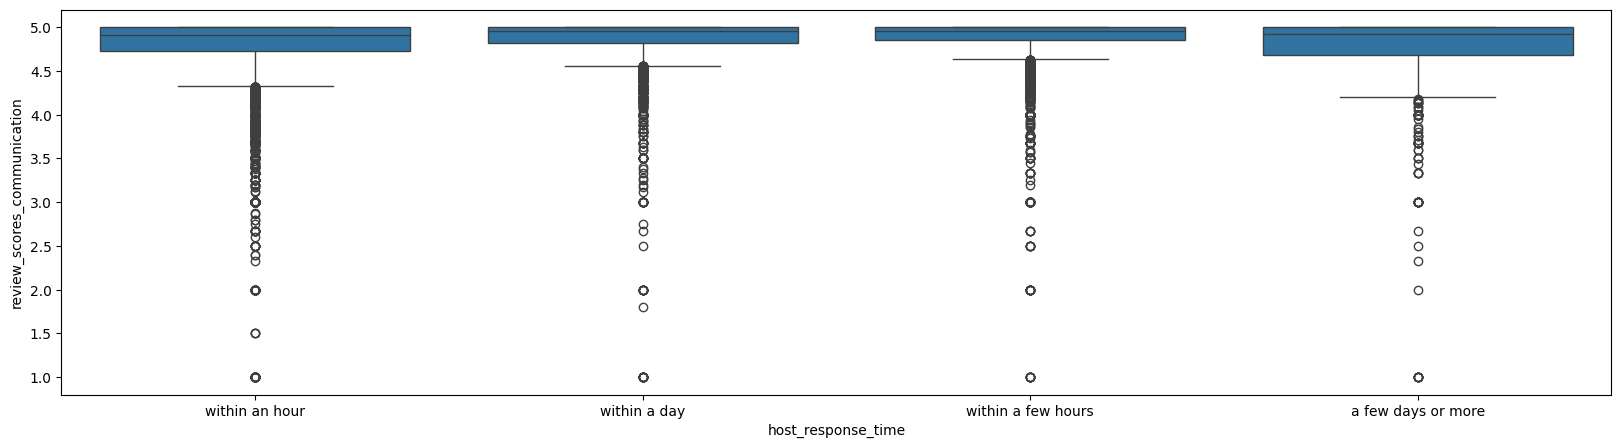

In [81]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=listings,y="review_scores_communication", x='host_response_time')
